In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df_eda = pd.read_csv('../datasets/cleaned(3).csv')

# Kemenhub

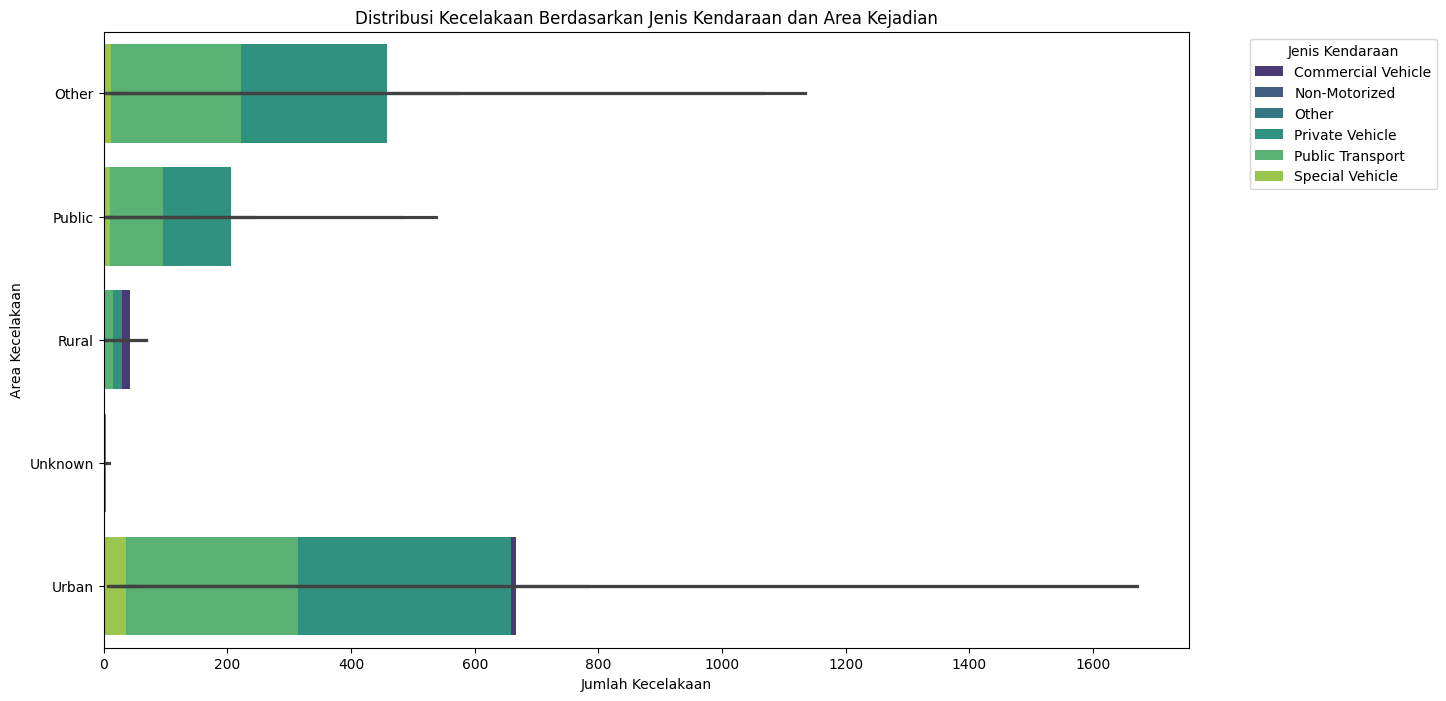

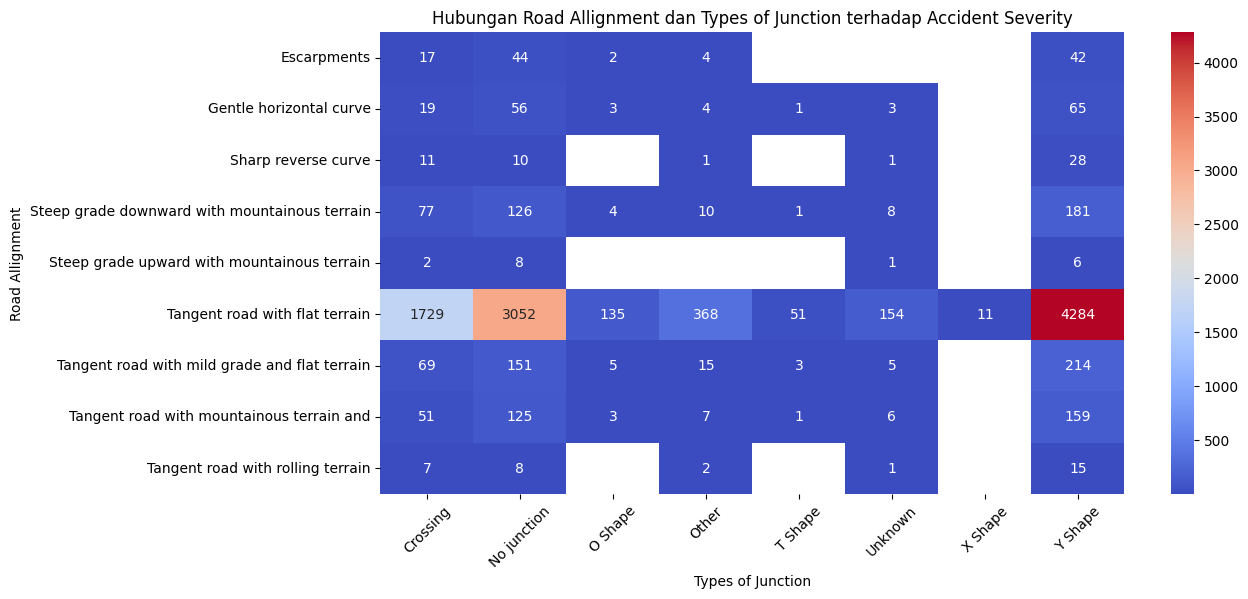

In [21]:

# Pilih hanya kolom yang relevan dan hilangkan missing values
selected_columns = ["Type_of_vehicle", "Area_accident_occured", "Lanes_or_Medians", 
                    "Road_allignment", "Types_of_Junction", "Road_surface_type", "Accident_severity"]
df_cleaned = df_eda[selected_columns].dropna()

# 1. Stacked Bar Plot: Area_accident_occured vs Type_of_vehicle dengan Accident Severity
plt.figure(figsize=(14, 8))
accident_counts = df_cleaned.groupby(["Area_accident_occured", "Type_of_vehicle", "Accident_severity"]).size().reset_index(name='Count')
sns.barplot(data=accident_counts, x="Count", y="Area_accident_occured", hue="Type_of_vehicle", dodge=False, palette="viridis")
plt.xlabel("Jumlah Kecelakaan")
plt.ylabel("Area Kecelakaan")
plt.title("Distribusi Kecelakaan Berdasarkan Jenis Kendaraan dan Area Kejadian")
plt.legend(title="Jenis Kendaraan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Heatmap: Road_allignment vs Types_of_Junction dengan Accident Severity
plt.figure(figsize=(12, 6))
heatmap_data = df_cleaned.pivot_table(index="Road_allignment", columns="Types_of_Junction", values="Accident_severity", aggfunc="count")
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Hubungan Road Allignment dan Types of Junction terhadap Accident Severity")
plt.xlabel("Types of Junction")
plt.ylabel("Road Allignment")
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

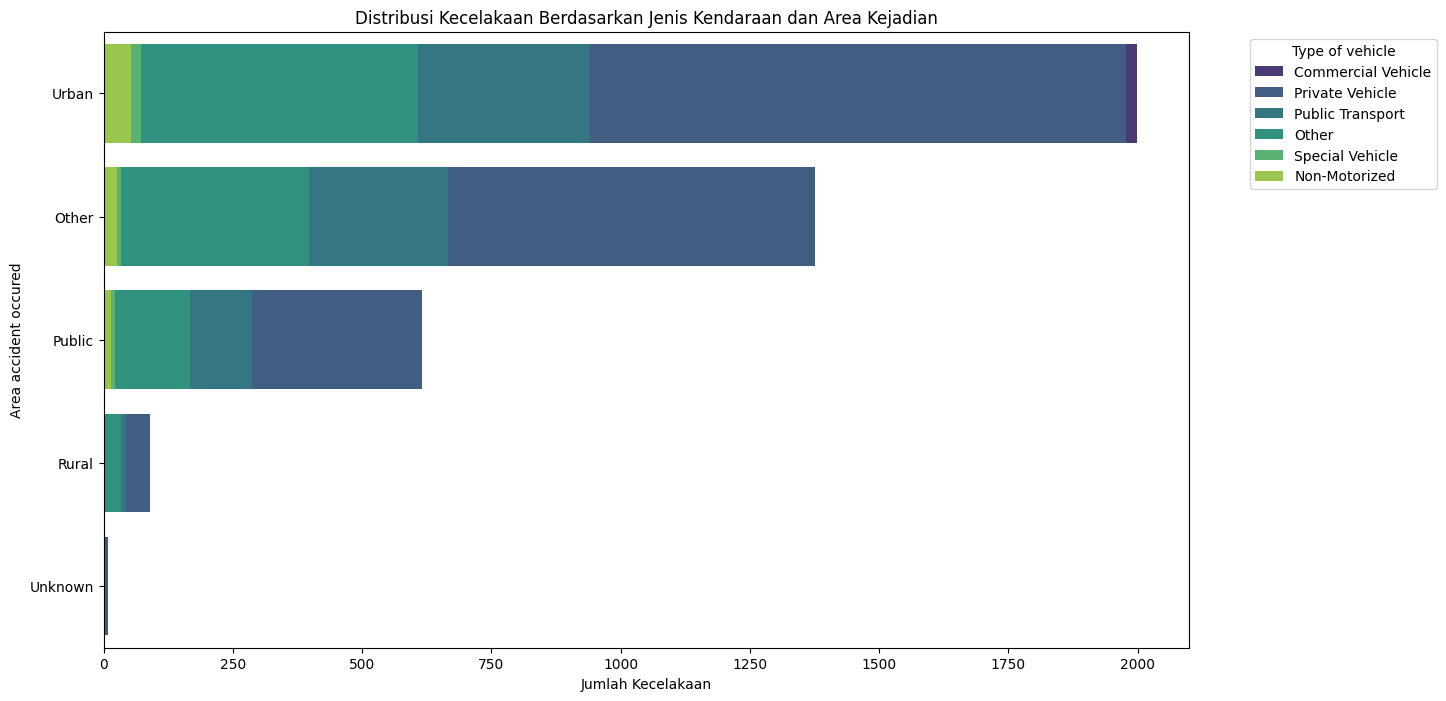

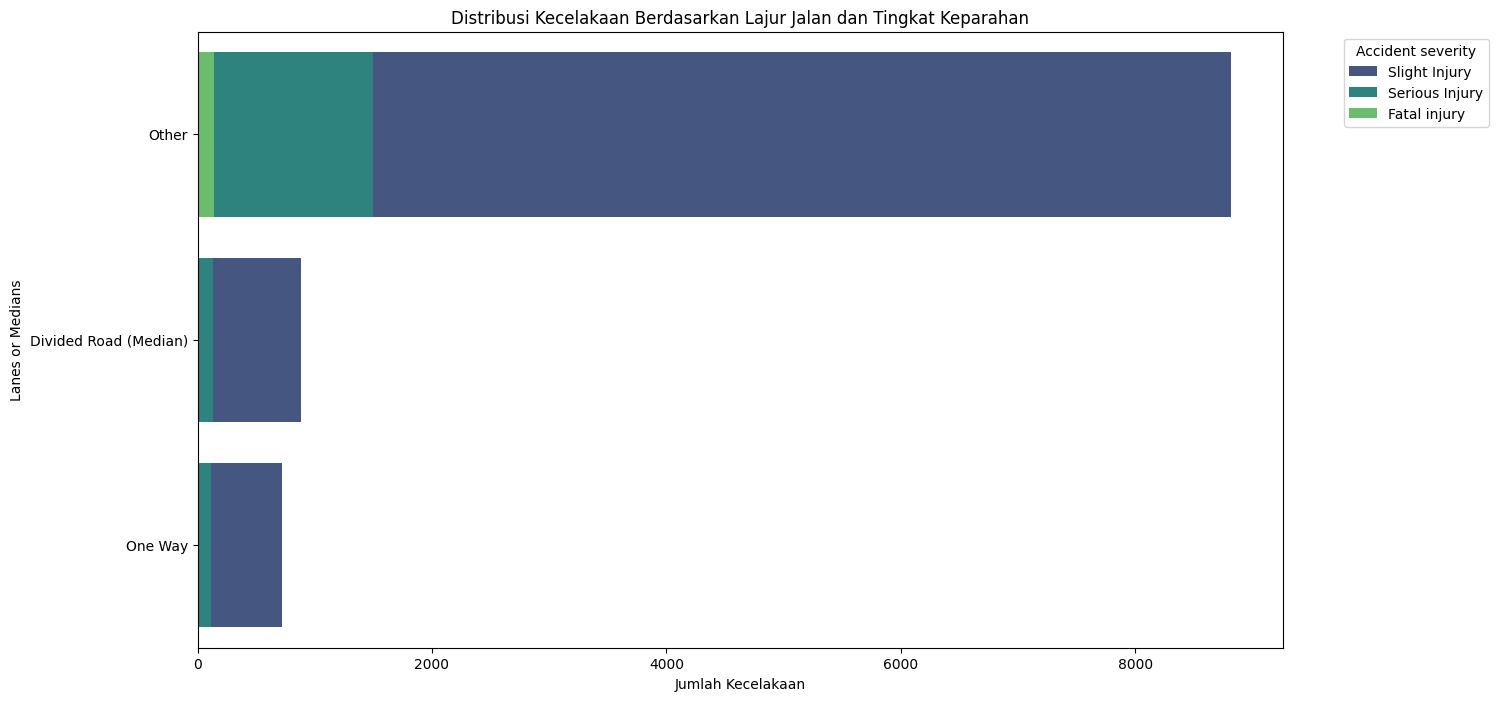

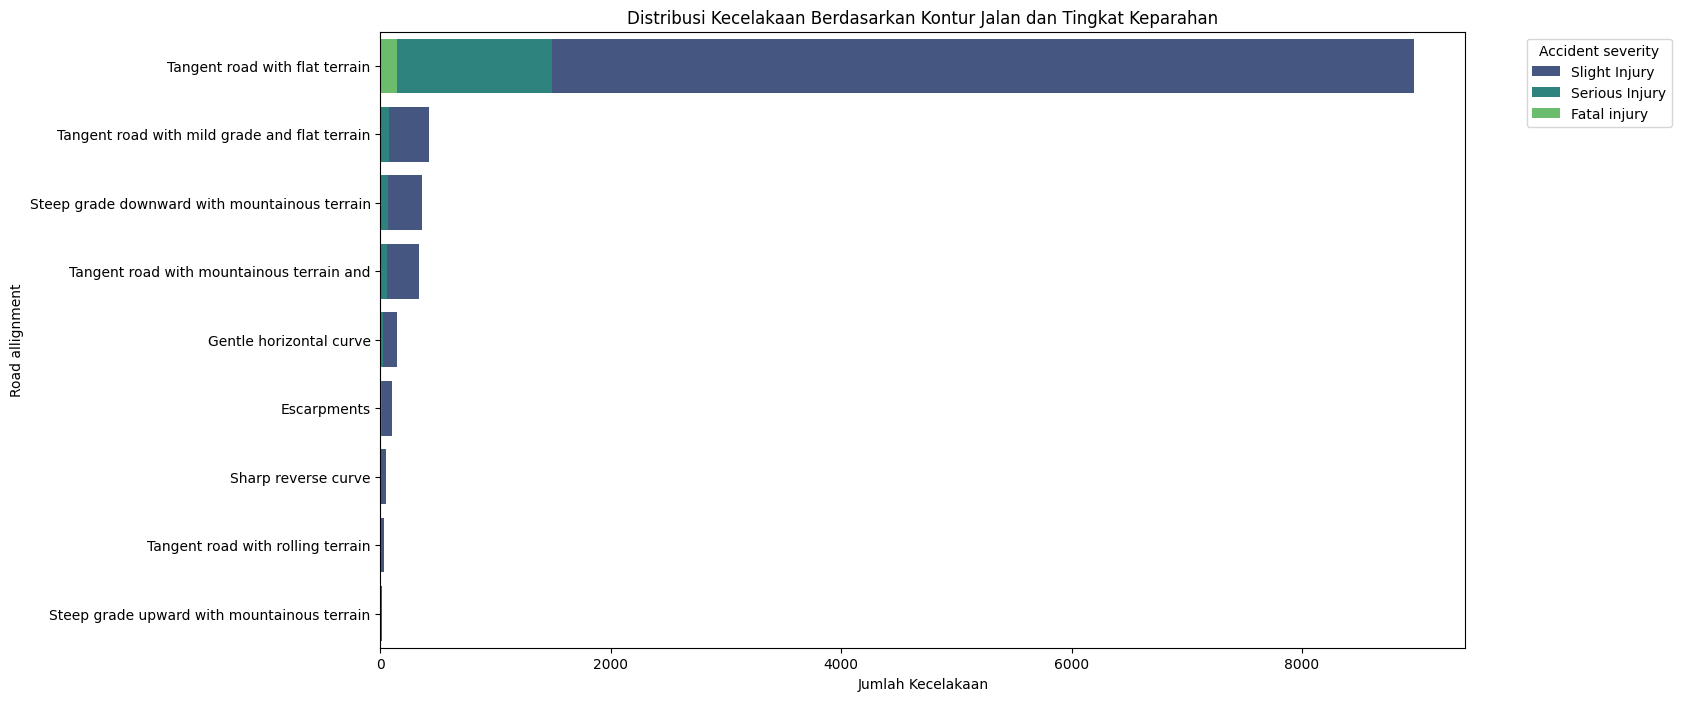

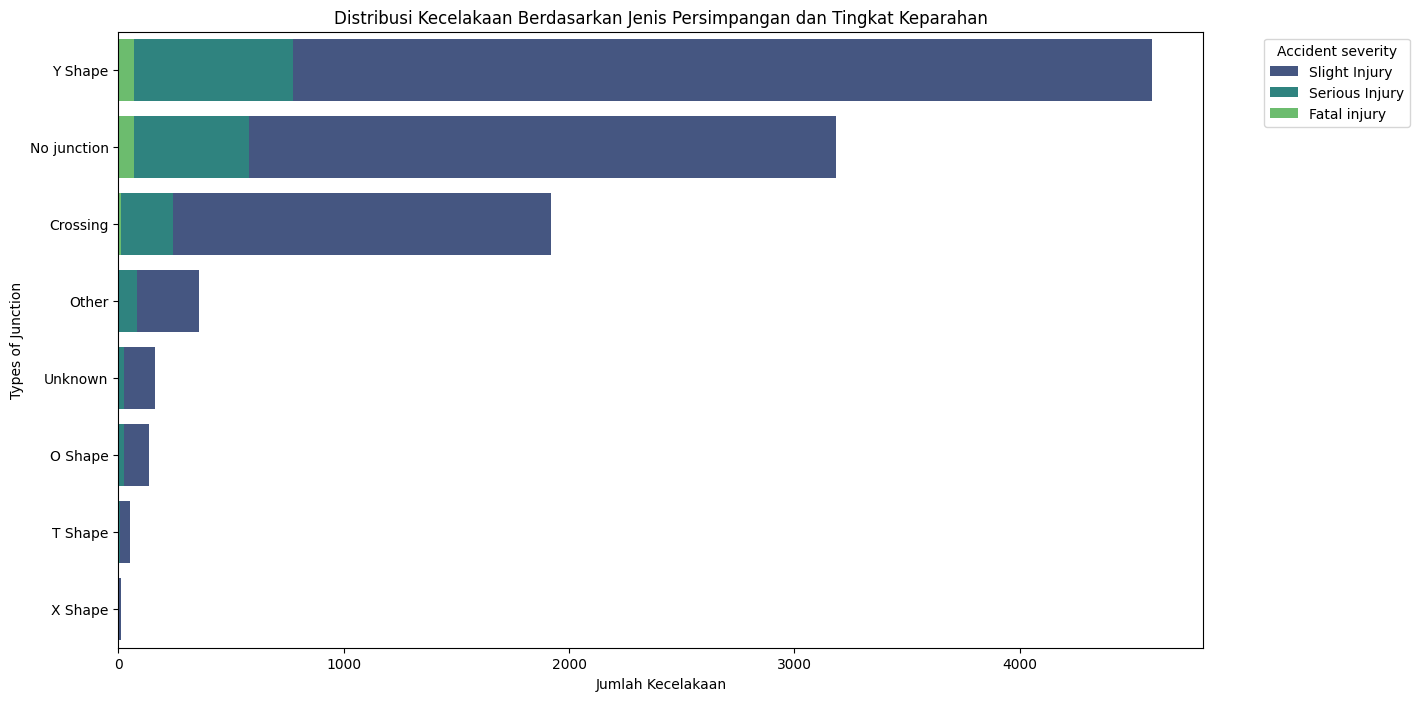

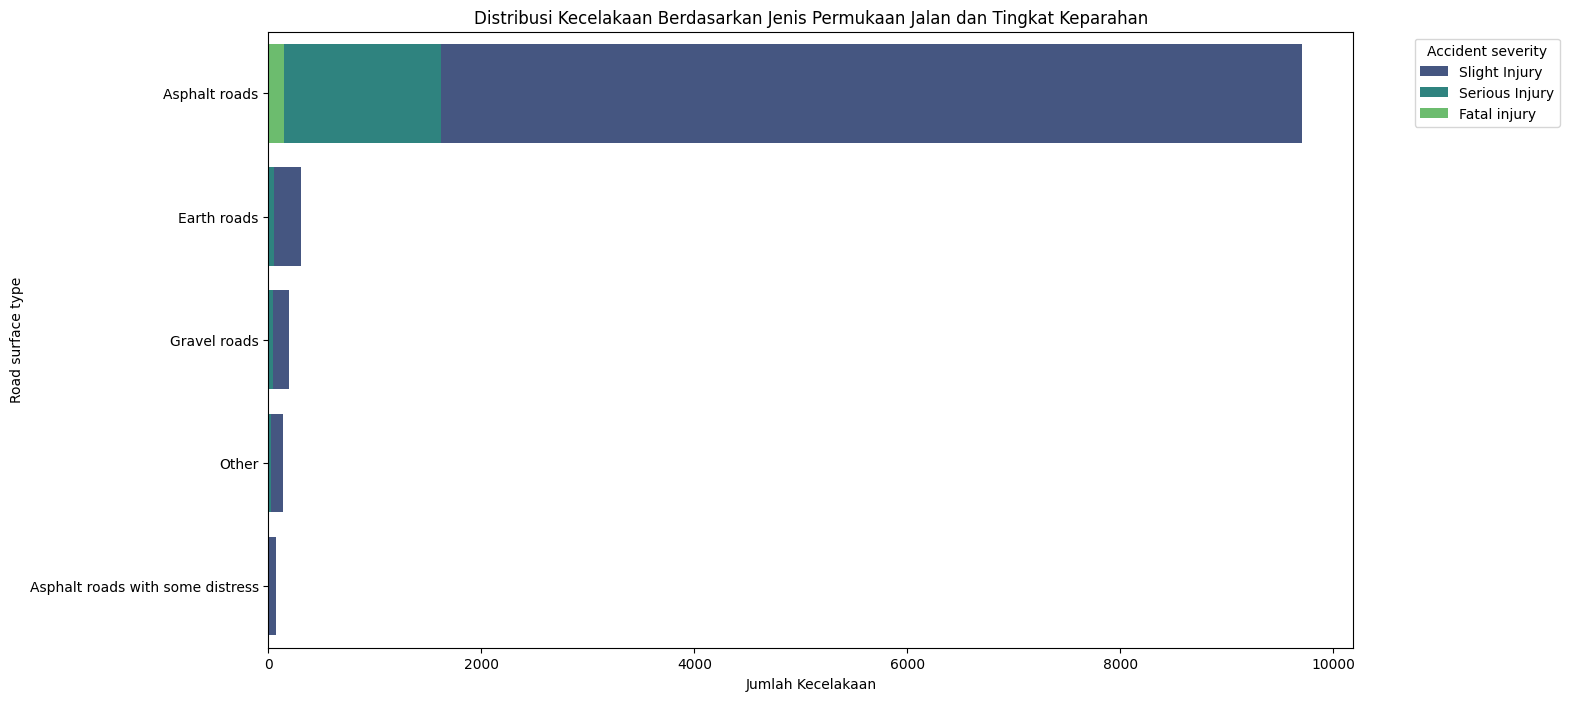

In [20]:
# Define the features for visualization
features = [
    ("Area_accident_occured", "Type_of_vehicle", "Distribusi Kecelakaan Berdasarkan Jenis Kendaraan dan Area Kejadian"),
    ("Lanes_or_Medians", "Accident_severity", "Distribusi Kecelakaan Berdasarkan Lajur Jalan dan Tingkat Keparahan"),
    ("Road_allignment", "Accident_severity", "Distribusi Kecelakaan Berdasarkan Kontur Jalan dan Tingkat Keparahan"),
    ("Types_of_Junction", "Accident_severity", "Distribusi Kecelakaan Berdasarkan Jenis Persimpangan dan Tingkat Keparahan"),
    ("Road_surface_type", "Accident_severity", "Distribusi Kecelakaan Berdasarkan Jenis Permukaan Jalan dan Tingkat Keparahan")
]

# Set up the plot size
plt.figure(figsize=(14, 8))

# Generate visualizations for each feature pair
for i, (feature_x, feature_hue, title) in enumerate(features):
    df_cleaned = df_eda[[feature_x, feature_hue]].dropna()
    accident_counts = df_cleaned.groupby([feature_x, feature_hue]).size().reset_index(name='Count')
    accident_counts = accident_counts.sort_values(by="Count", ascending=False)

    plt.figure(figsize=(14, 8))
    sns.barplot(data=accident_counts, x="Count", y=feature_x, hue=feature_hue, dodge=False, palette="viridis")
    plt.xlabel("Jumlah Kecelakaan")
    plt.ylabel(feature_x.replace("_", " "))
    plt.title(title)
    plt.legend(title=feature_hue.replace("_", " "), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


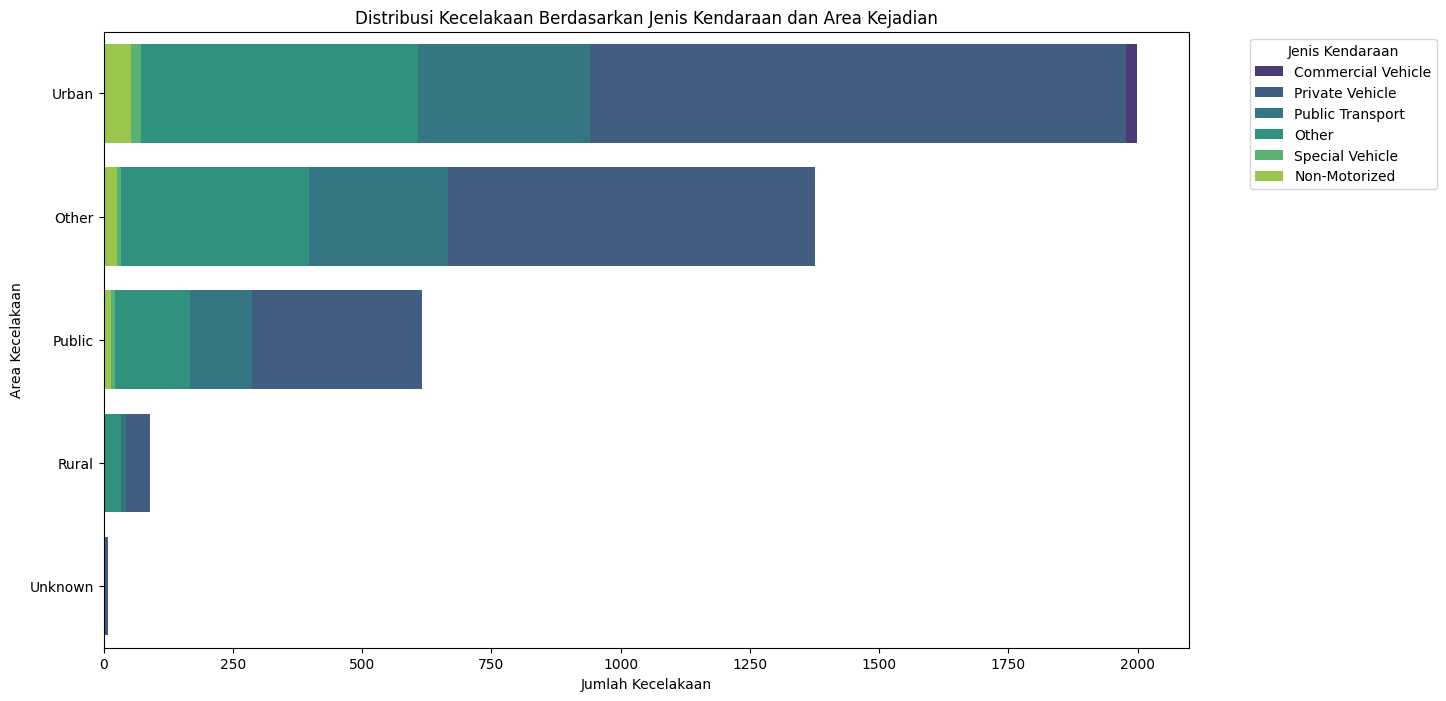

In [16]:
df_cleaned = df_eda[["Type_of_vehicle", "Area_accident_occured"]].dropna()

accident_counts = df_cleaned.groupby(["Area_accident_occured", "Type_of_vehicle"]).size().reset_index(name='Count')

accident_counts = accident_counts.sort_values(by="Count", ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=accident_counts, x="Count", y="Area_accident_occured", hue="Type_of_vehicle", dodge=False, palette="viridis")
plt.xlabel("Jumlah Kecelakaan")
plt.ylabel("Area Kecelakaan")
plt.title("Distribusi Kecelakaan Berdasarkan Jenis Kendaraan dan Area Kejadian")
plt.legend(title="Jenis Kendaraan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


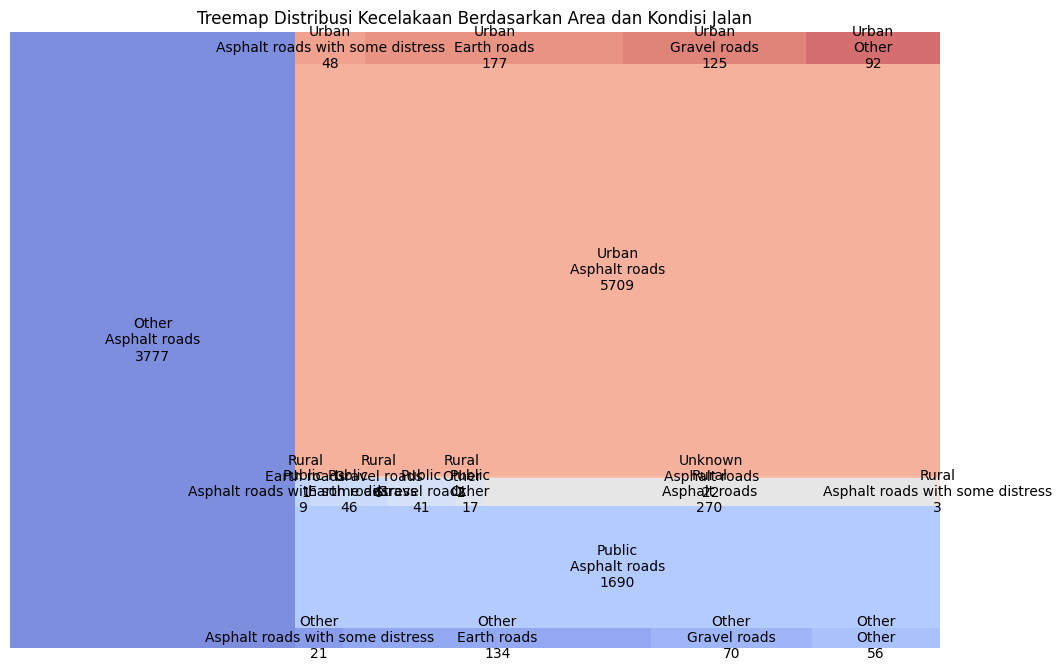

In [ ]:
import squarify

area_surface_counts = df_eda.groupby(['Area_accident_occured', 'Road_surface_type']).size().reset_index(name='count')

area_surface_counts['label'] = area_surface_counts['Area_accident_occured'] + "\n" + area_surface_counts['Road_surface_type'] + "\n" + area_surface_counts['count'].astype(str)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=area_surface_counts['count'], label=area_surface_counts['label'], alpha=0.7, color=sns.color_palette("coolwarm", len(area_surface_counts)))
plt.title("Treemap Distribusi Kecelakaan Berdasarkan Area dan Kondisi Jalan")
plt.axis('off')
plt.show()


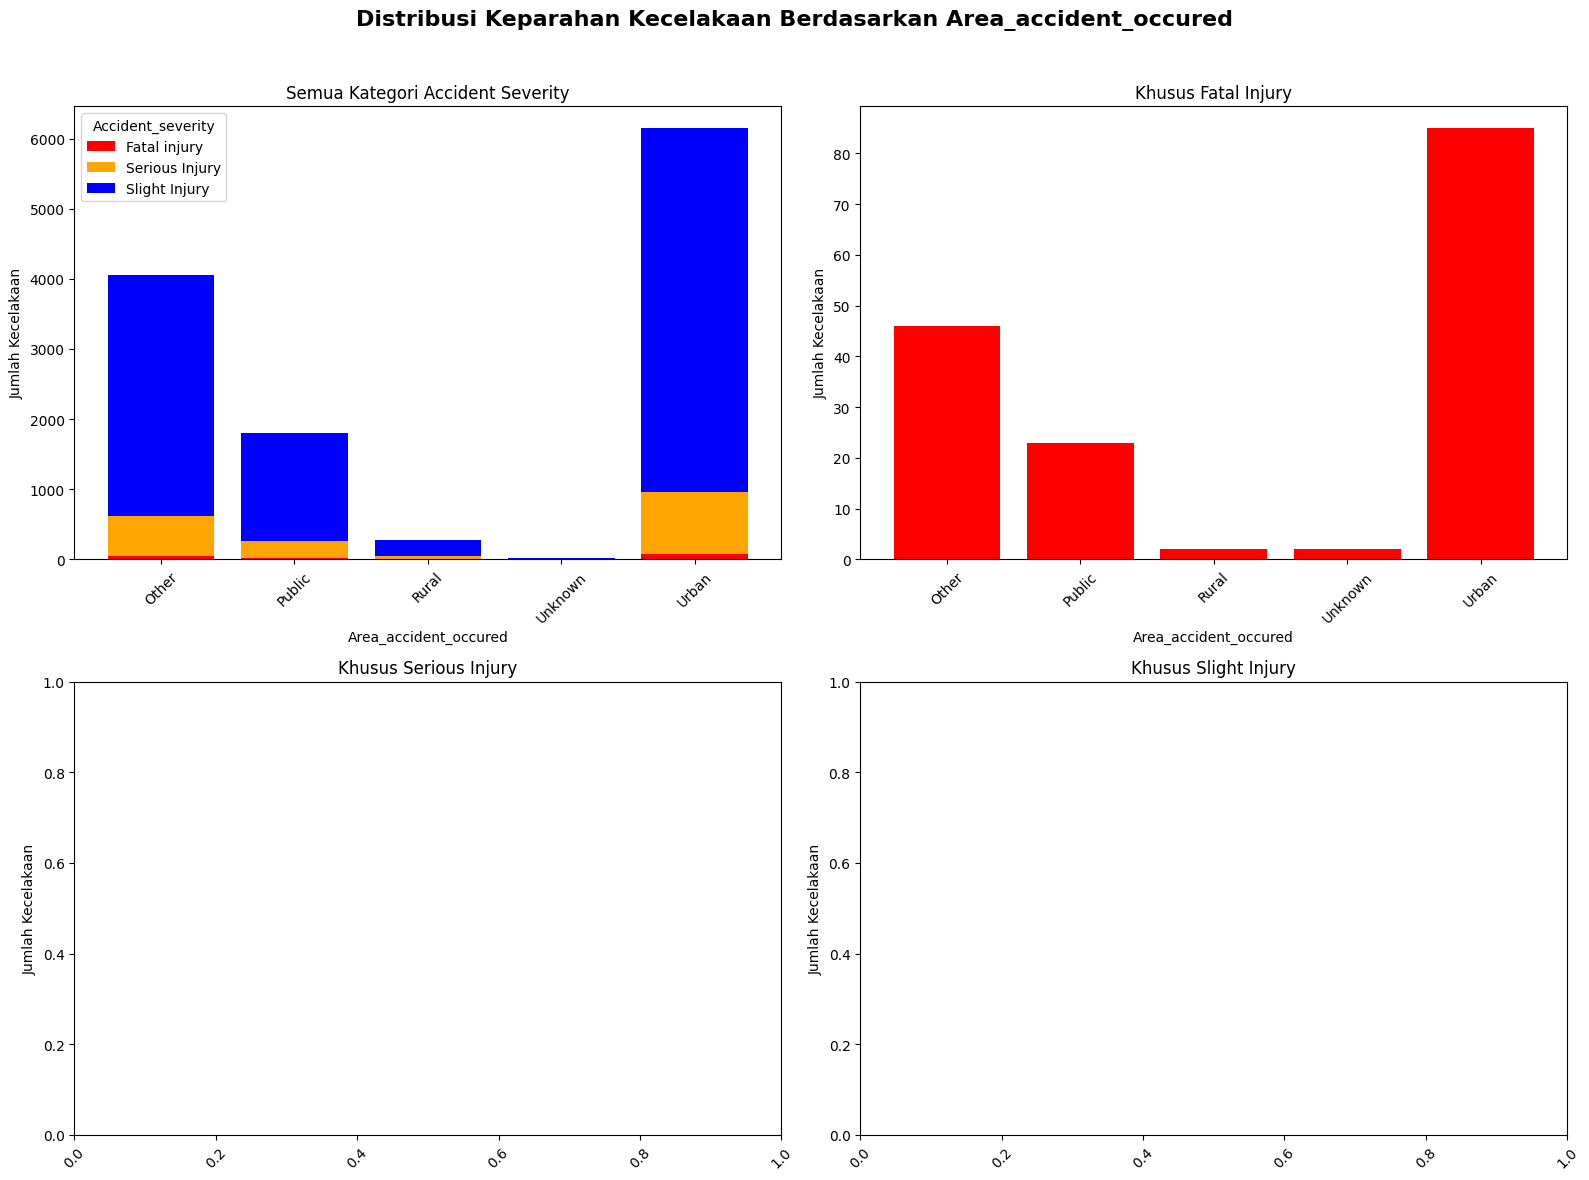

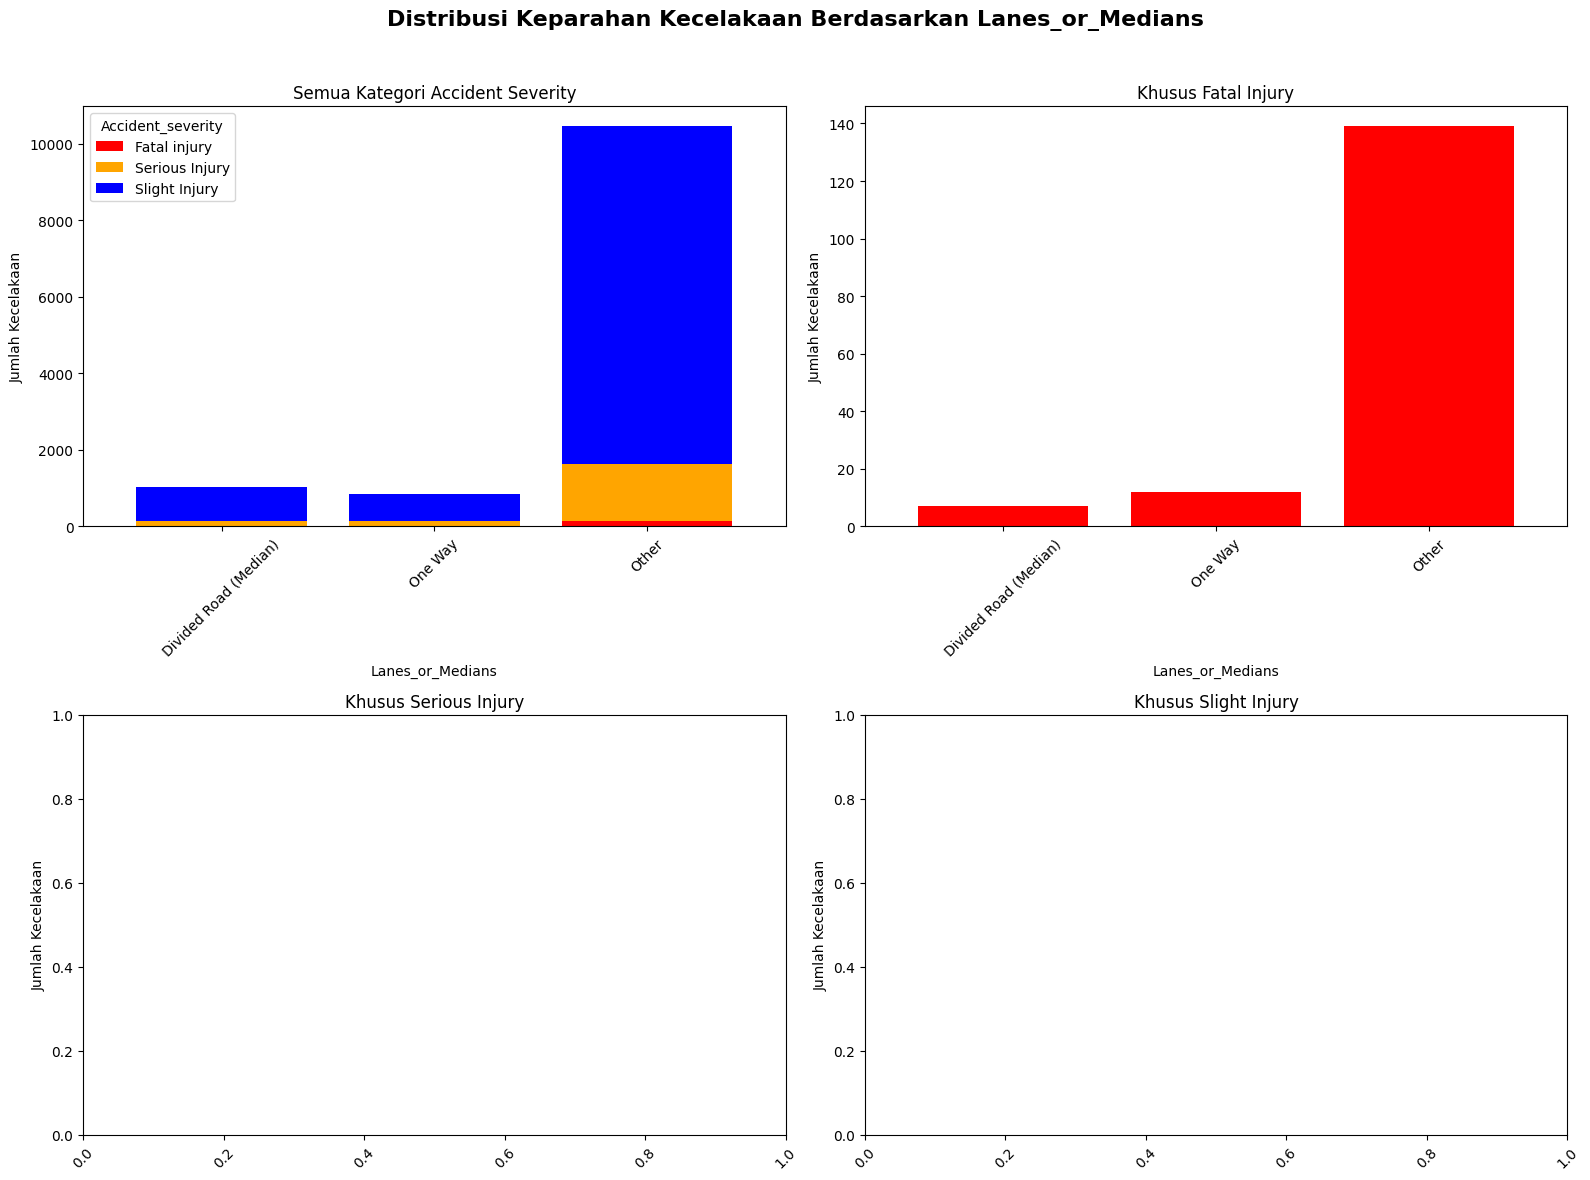

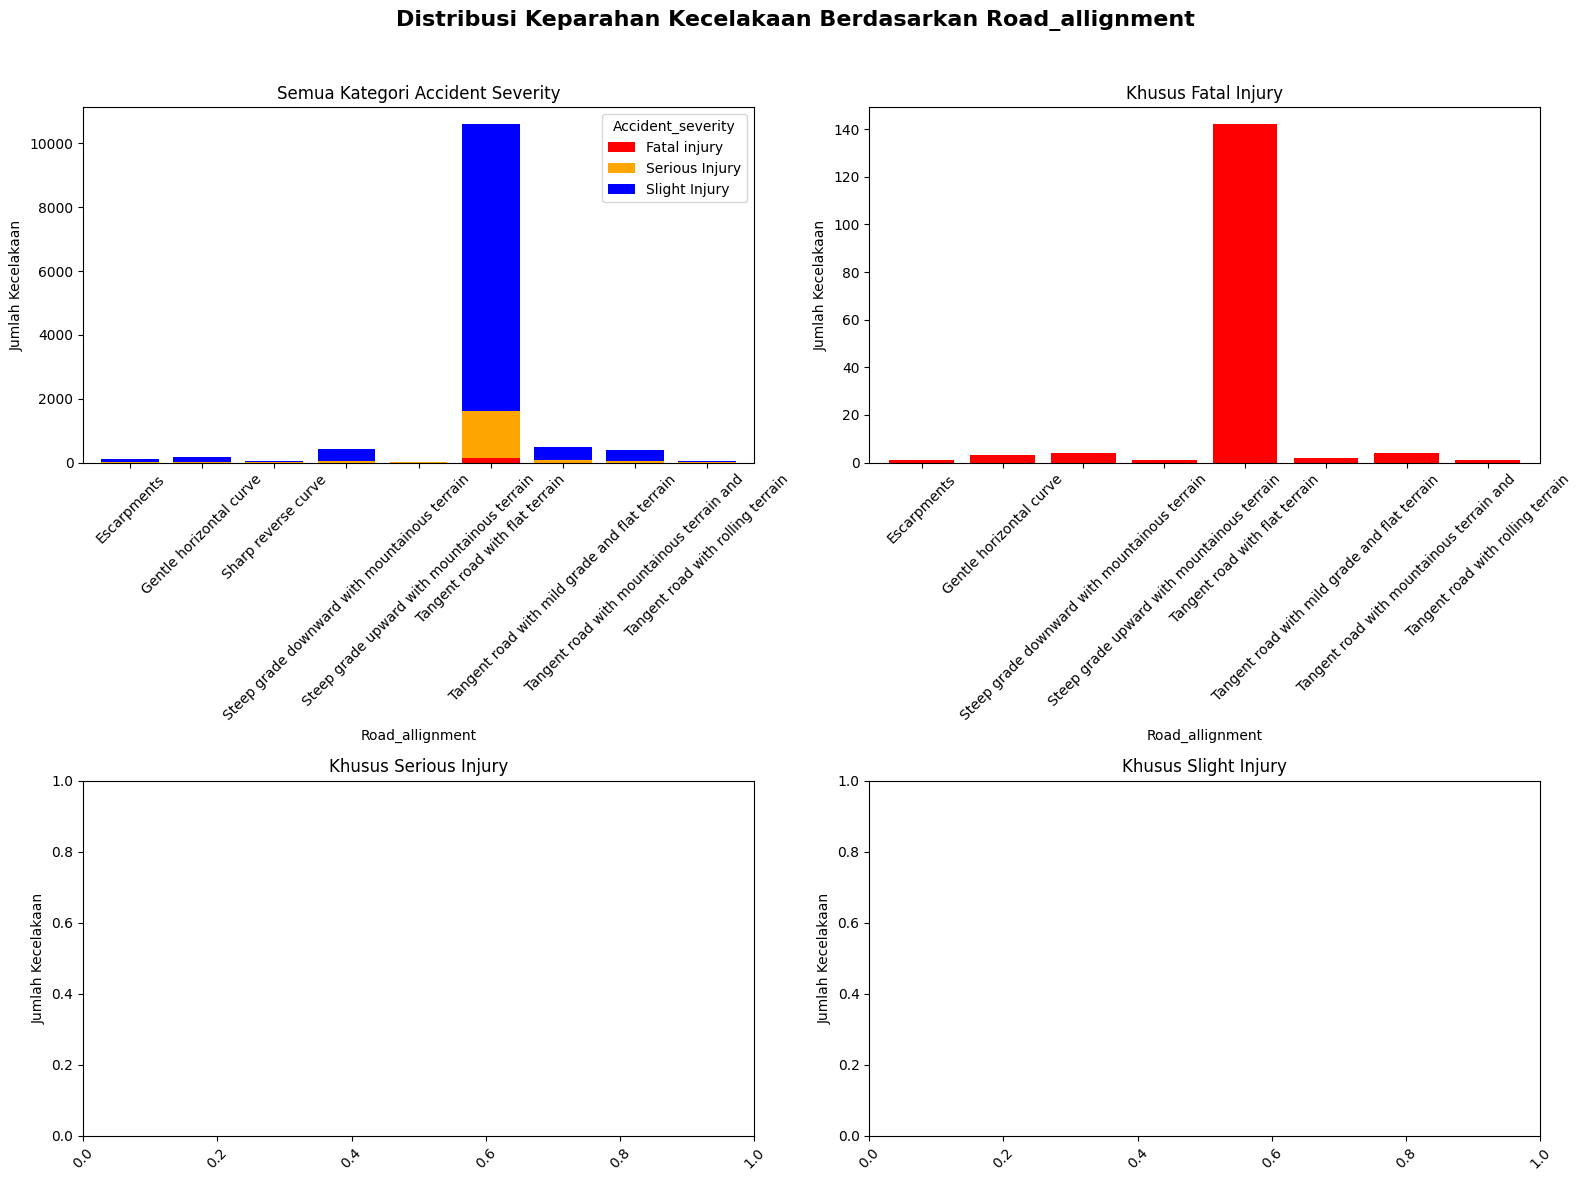

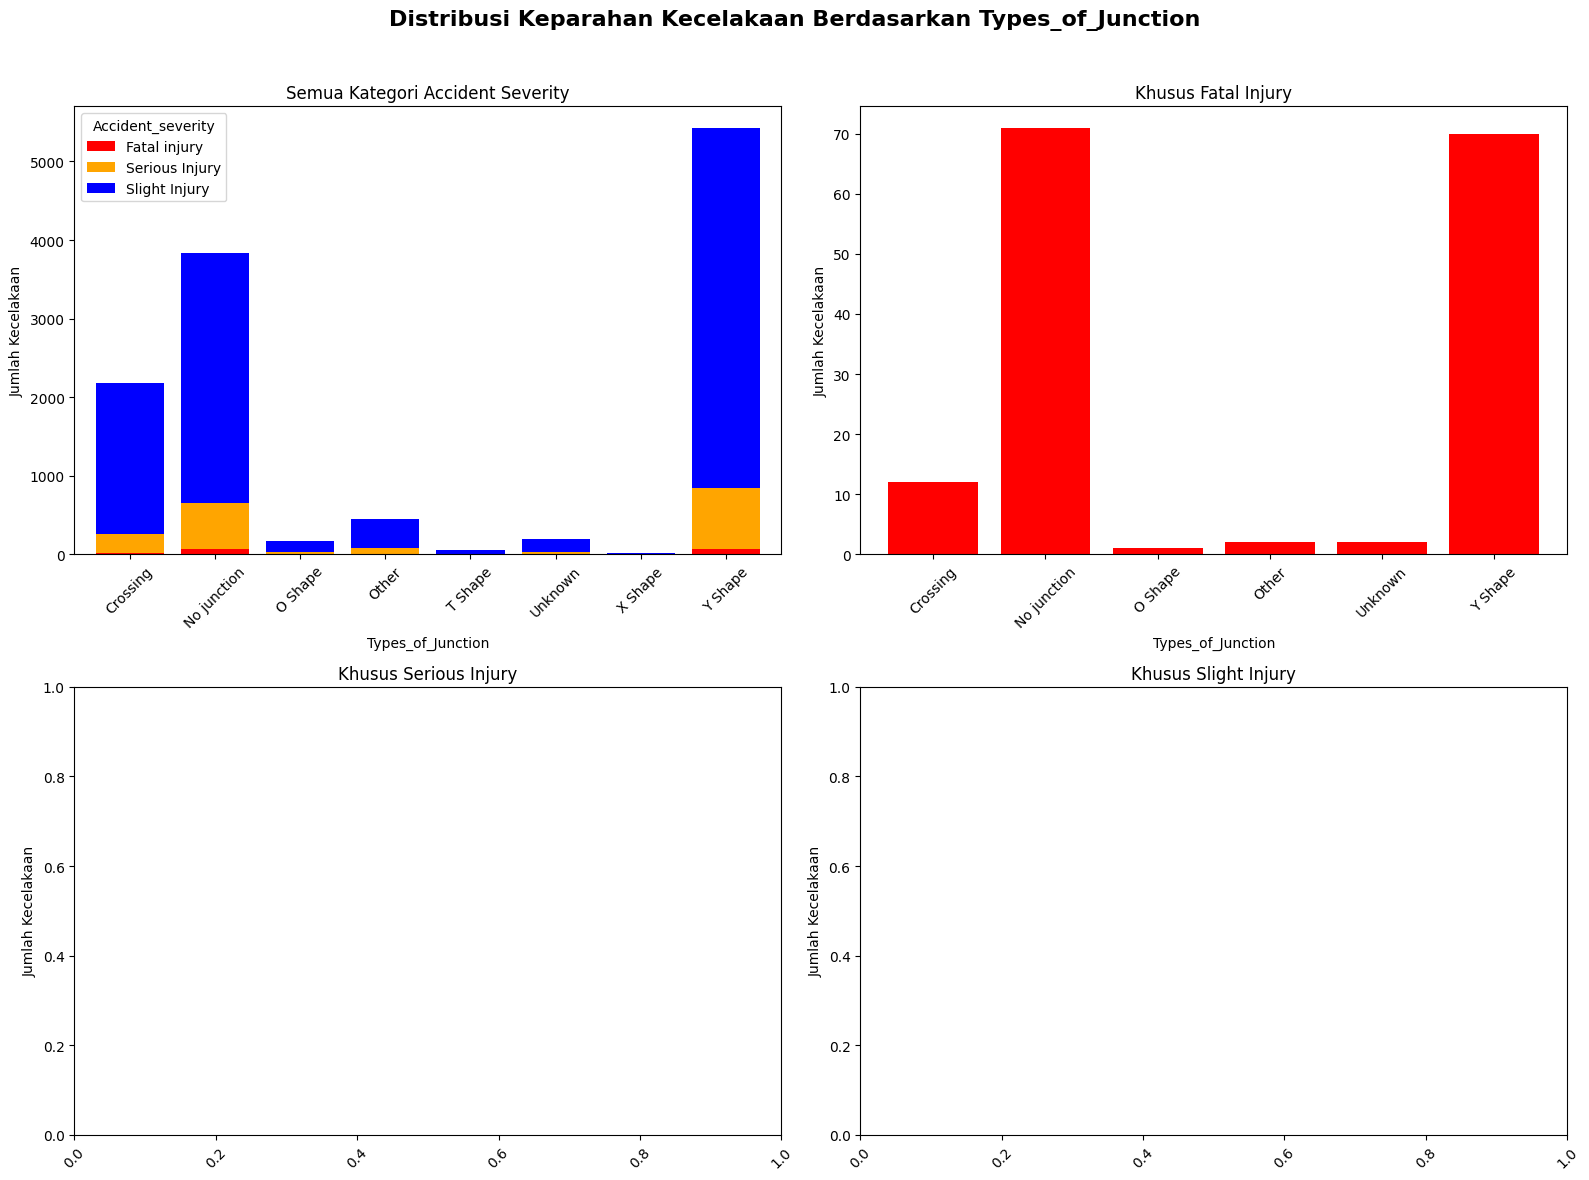

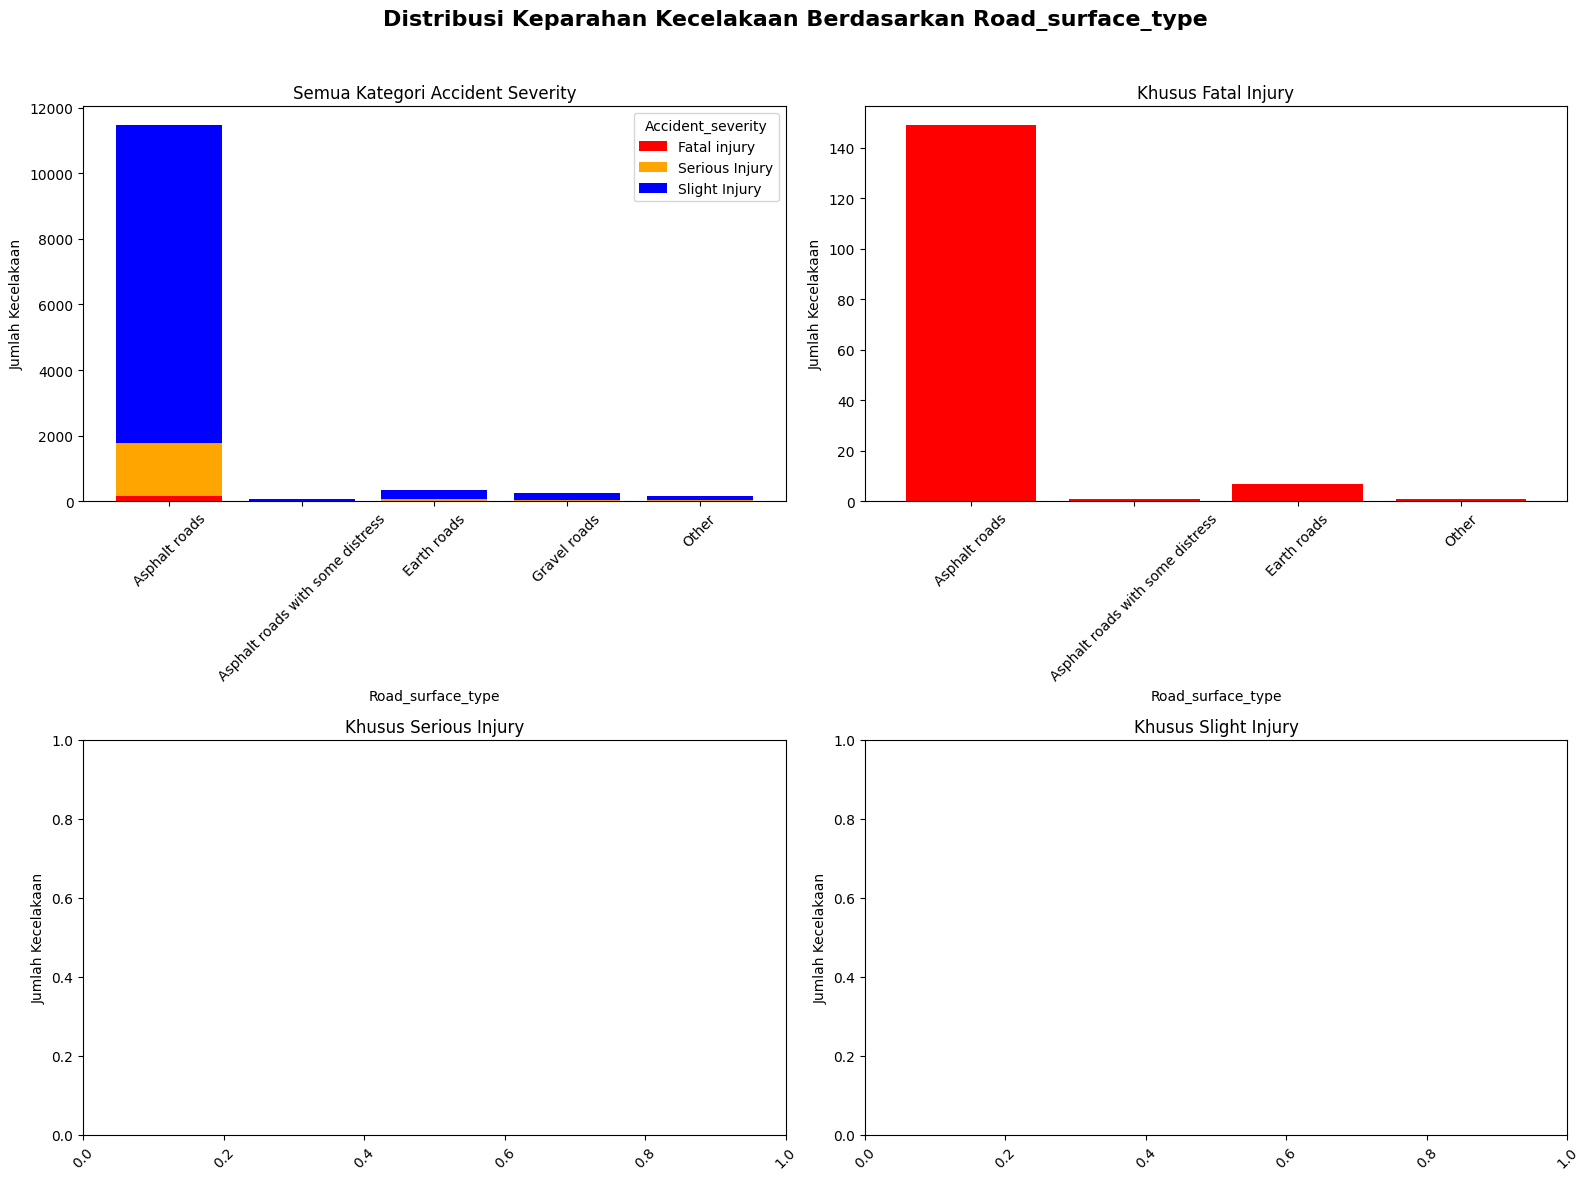

In [17]:

features = ['Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type']
severity_classes = ['Fatal injury', 'Serious injury', 'Slight injury']
colors = {'Fatal injury': 'red', 'Serious injury': 'orange', 'Slight injury': 'blue'}
for feature in features:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f"Distribusi Keparahan Kecelakaan Berdasarkan {feature}", fontsize=16, fontweight='bold')

    # 1. plot untuk semua severity
    data_all = df_eda.groupby([feature, 'Accident_severity']).size().unstack(fill_value=0)
    data_all.plot(kind='bar', stacked=True, ax=axes[0, 0], color=[colors[sev] for sev in severity_classes], width=0.8)
    axes[0, 0].set_title("Semua Kategori Accident Severity")
    axes[0, 0].set_ylabel("Jumlah Kecelakaan")
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. plot untuk Fatal Injury
    data_fatal = df_eda[df_eda['Accident_severity'] == 'Fatal injury'].groupby(feature).size()
    if not data_fatal.empty:
        data_fatal.plot(kind='bar', color='red', ax=axes[0, 1], width=0.8)
    axes[0, 1].set_title("Khusus Fatal Injury")
    axes[0, 1].set_ylabel("Jumlah Kecelakaan")
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. plot untuk Serious Injury
    data_serious = df_eda[df_eda['Accident_severity'] == 'Serious injury'].groupby(feature).size()
    if not data_serious.empty:
        data_serious.plot(kind='bar', color='orange', ax=axes[1, 0], width=0.8)
    axes[1, 0].set_title("Khusus Serious Injury")
    axes[1, 0].set_ylabel("Jumlah Kecelakaan")
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. plot untuk Slight Injury
    data_slight = df_eda[df_eda['Accident_severity'] == 'Slight injury'].groupby(feature).size()
    if not data_slight.empty:
        data_slight.plot(kind='bar', color='blue', ax=axes[1, 1], width=0.8)
    axes[1, 1].set_title("Khusus Slight Injury")
    axes[1, 1].set_ylabel("Jumlah Kecelakaan")
    axes[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


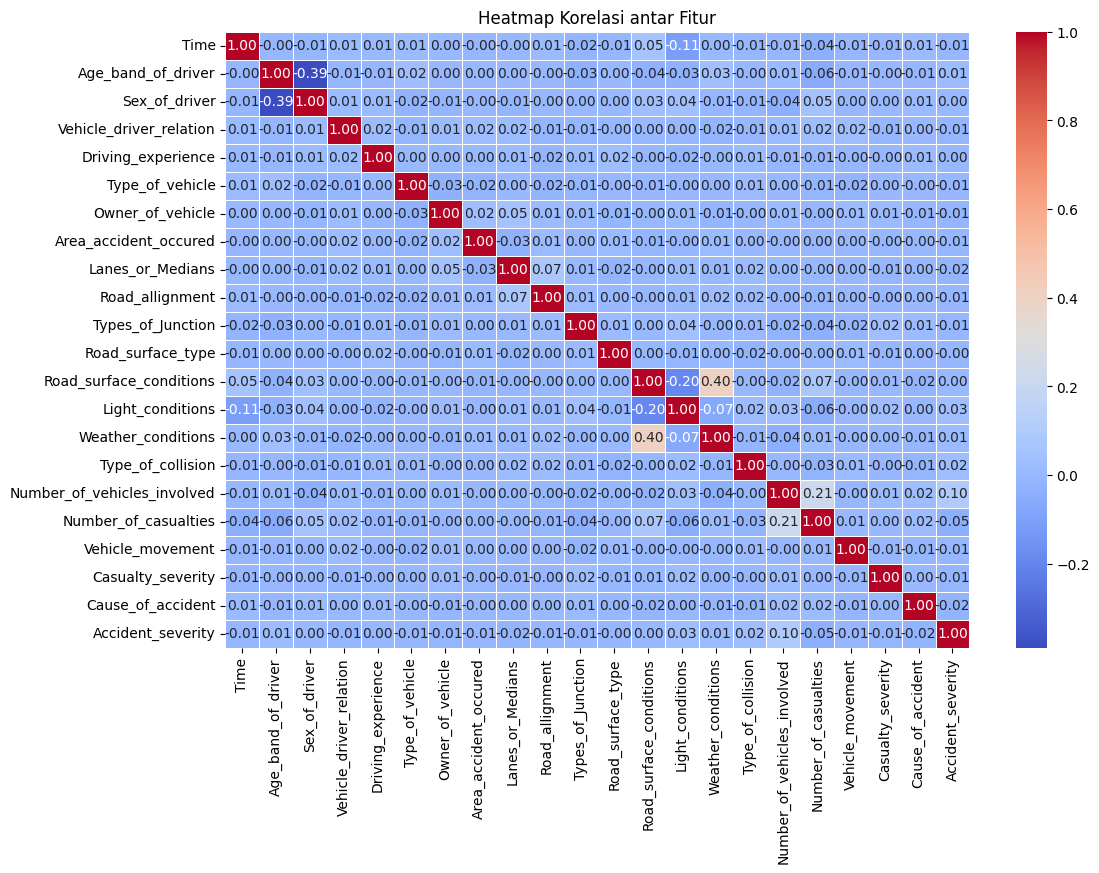

In [ ]:
import numpy as np

df_encoded = df_eda.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh, asumsikan df adalah DataFrame Anda
# df = ...

# Penanganan nilai yang hilang
df = df.fillna(df.mean())

# Encoding variabel kategori (contoh: one-hot encoding)
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

# Menghitung korelasi
corr_matrix = df_encoded.corr()

# Plot heatmap korelasi
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="RdBu", linewidths=0.5, mask=mask, vmin=-1, vmax=1)
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Fitur", fontsize=12)
plt.show()

In [11]:
df_eda.duplicated().sum()

0

In [18]:
df_eda.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [3]:
df_eda.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df_eda.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eda_feature(df: pd.DataFrame, feature: str):
    """
    Melakukan eksplorasi data pada satu fitur
    :param df: DataFrame
    :param feature: Nama fitur yang akan dianalisis
    """
    if feature not in df.columns:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")
        return
    
    print(f"\nAnalisis untuk fitur: {feature}\n")
    
    # Cek missing values
    missing = df[feature].isnull().sum()
    print(f"Missing values: {missing}")
    
    # Statistik Deskriptif
    print("\nStatistik deskriptif:")
    print(df[feature].describe())
    
    # Visualisasi Distribusi
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()
    
    # Cek Outlier dengan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    print(f"Jumlah outlier: {outliers}\n")

def check_correlation(df: pd.DataFrame, feature: str):
    """
    Menghitung dan menampilkan korelasi fitur tertentu dengan fitur lainnya
    :param df: DataFrame
    :param feature: Nama fitur yang akan dianalisis korelasinya
    """
    if feature not in df.columns:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")
        return
    
    corr_series = df.corr()[feature].drop(feature)
    print(corr_series.sort_values(ascending=False))



Analisis untuk fitur: Day_of_week

Missing values: 0

Statistik deskriptif:
count      12316
unique         7
top       Friday
freq        2041
Name: Day_of_week, dtype: object


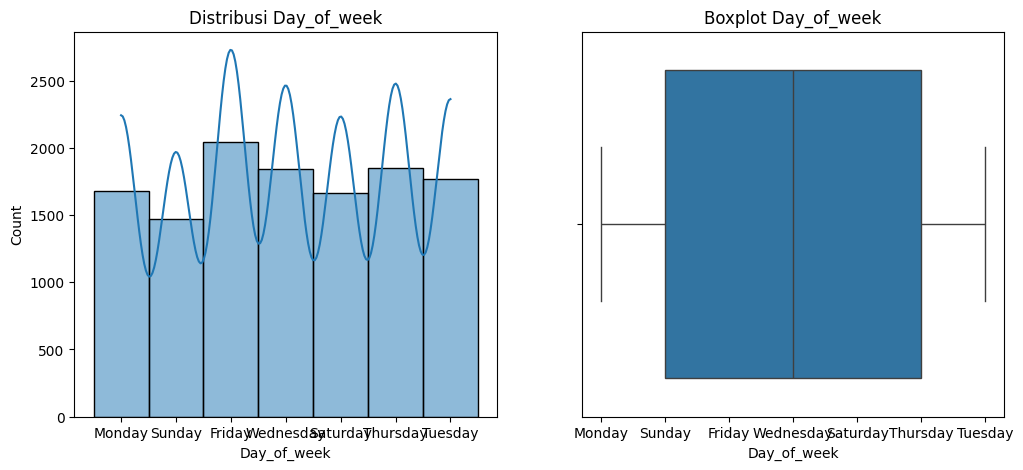

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [9]:
eda_feature(df_eda, 'Day_of_week')